In [1]:
import pandas as pd
import numpy as np
import os
import torch

In [2]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.utils import to_categorical 
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.layers import concatenate
from keras import optimizers
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import gc
from tensorflow.keras import regularizers
from keras.layers import Conv2D, BatchNormalization, Activation, Add
from keras import callbacks
import glob
import pickle
from keras.layers import Dense, Input, Flatten, MaxPooling2D, Activation, Dropout, Average
from keras.models import Model
from keras.models import load_model
from keras.optimizers import Adam

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Train_Normal Data 

In [4]:
#train_normal
dirpath = '/content/drive/MyDrive/DL/train/normal/'
results = os.listdir(dirpath)
R = []
for i in range(len(results)):
  r = [results[i][idx:idx+7] for idx in range(0,len(results[i]),7)]
  R.append(r[0])
R=sorted(R)
num=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21']
filepath = []
for i in range(0,len(R),22):
  for j in range(22):
    filepath.append(dirpath + R[i] +'_' + str(num[j]) + '.jpg')
train_normal = []
for i in range(len(filepath)):
  img = cv2.imread(filepath[i])
  crop_size = (350,350)
  img2 = cv2.resize(img,crop_size,interpolation=cv2.INTER_AREA)#resampling using pixel area relation
  train_normal.append(img2)
train_normal = np.array(train_normal)

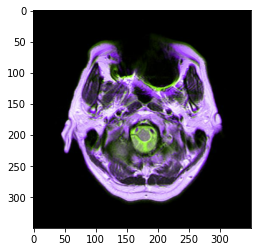

In [5]:
plt.imshow(train_normal[0])
plt.show()

## Train_Tumor Data

In [6]:
#train_tumor
dirpath2 = '/content/drive/MyDrive/DL/train/tumor/'
results2 = os.listdir(dirpath2)
R2 = []
for i in range(len(results2)):
  r = [results2[i][idx:idx+7] for idx in range(0,len(results2[i]),7)]
  R2.append(r[0])
df_r = pd.DataFrame(R2)
df_r.columns = ['file']
idx = ['3015828','0004355','5008735','3000485','0839507','0800453']
for i in range(len(idx)):
  R2.remove(idx[i])
R2=sorted(R2)
filepath2 = []
for i in range(0,len(R2),22):
  for j in range(22):
    filepath2.append(dirpath2 + R2[i] +'_' + str(num[j]) + '.jpg')
train_tumor = []
for i in range(len(filepath2)):
  img = cv2.imread(filepath2[i])
  crop_size = (350,350)
  img2 = cv2.resize(img,crop_size,interpolation=cv2.INTER_AREA)
  train_tumor.append(img2)
train_tumor = np.array(train_tumor)

## Valid_Normal Data

In [7]:
#valid_normal
dirpath3 = '/content/drive/MyDrive/DL/valid/normal/'
results3 = os.listdir(dirpath3)
R3 = []
for i in range(len(results3)):
  r = [results3[i][idx:idx+7] for idx in range(0,len(results3[i]),7)]
  R3.append(r[0])
df_r = pd.DataFrame(R3)
df_r.columns = ['file']
R3 = sorted(R3)
filepath3 = []
for i in range(0,len(R3),22):
  for j in range(22):
    filepath3.append(dirpath3 + R3[i] +'_' + str(num[j]) + '.jpg')
  valid_normal = []
for i in range(len(filepath3)):
    img = cv2.imread(filepath3[i])
    crop_size = (350,350)
    img2 = cv2.resize(img,crop_size,interpolation=cv2.INTER_AREA)
    valid_normal.append(img2)
valid_normal = np.array(valid_normal)

## Valid_Tumor Data

In [8]:
#valid_tumor
dirpath4 = '/content/drive/MyDrive/DL/valid/tumor/'
results4 = os.listdir(dirpath4)
R4 = []
for i in range(len(results4)):
  r = [results4[i][idx:idx+7] for idx in range(0,len(results4[i]),7)]
  R4.append(r[0])
df_r = pd.DataFrame(R4)
df_r.columns = ['file']
R4 = sorted(R4)
filepath4 = []
for i in range(0,len(R4),22):
  for j in range(22):
    filepath4.append(dirpath4 + R4[i] +'_' + str(num[j]) + '.jpg')
valid_tumor = []
for i in range(len(filepath4)):
  img = cv2.imread(filepath4[i])
  crop_size = (350,350)
  img2 = cv2.resize(img,crop_size,interpolation = cv2.INTER_AREA)
  valid_tumor.append(img2)
valid_tumor = np.array(valid_tumor)

## Test Data

In [9]:
#test
df_test = pd.read_csv('/content/drive/MyDrive/DL/hwk02_data/test.csv')
x = df_test['ID'].values
L = []
for i in range(len(x)):
  if(len(str(x[i])) < 7):
    t = '0' * (7 - len(str(x[i])))
    file = t + str(x[i])
  else:
    file = str(x[i])
  L.append(file)
X_test = pd.DataFrame()
X_test['ID'] = L
X_test
dirpath5 = '/content/drive/MyDrive/DL/test/'
results5 = os.listdir(dirpath5)
results5 = sorted(results5)
X_test=[]

for i in range(len(results5)):
  path = dirpath5 + results5[i]
  img = cv2.imread(path)
  crop_size = (350,350)
  img2 = cv2.resize(img,crop_size,interpolation = cv2.INTER_AREA)
  X_test.append(img2)
X_test = np.array(X_test)

## Train Data

In [10]:
X_train_2 = np.vstack((train_normal,train_tumor))

In [11]:
X_train_2.shape

(2464, 350, 350, 3)

In [12]:
y0 = np.zeros(len(train_normal))
y1 = np.ones(len(train_tumor))
y_train_2 = np.hstack((y0,y1))

In [13]:
y_train_2.shape

(2464,)

## Validation  Data

In [14]:
X_valid_2 = np.vstack((valid_normal,valid_tumor))

In [15]:
y0 = np.zeros(len(valid_normal))
y1 = np.ones(len(valid_tumor))
y_valid_2 = np.hstack((y0,y1))

In [16]:
X_valid_2.shape

(1056, 350, 350, 3)

In [17]:
import tensorflow as tf
from tensorflow import keras

## Transfer Data to fit the model

In [18]:
#shape --> (each patient, depth, height, width, channel)
X_train = X_train_2.reshape((112,22,350,350,3))
y_train = y_train_2.reshape((112,22))
X_valid = X_valid_2.reshape((48,22,350,350,3))
y_valid = y_valid_2.reshape((48,22))

In [19]:
#catch 3 feature maps on each patient
F1_train = []
F2_train = []
F3_train = []
F4_train = []
F5_train = []
F6_train = []
F7_train = []
F8_train = []
F9_train = []
F10_train = []

for i in range(len(X_train)):
  for j in range(9,19):
    if(j==9):
      F1_train.append(X_train[i][j])
    if(j==10):
      F2_train.append(X_train[i][j])
    if(j==11):
      F3_train.append(X_train[i][j])
    if(j==12):
      F4_train.append(X_train[i][j])
    if(j==13):
      F5_train.append(X_train[i][j])
    if(j==14):
      F6_train.append(X_train[i][j])
    if(j==15):
      F7_train.append(X_train[i][j])
    if(j==16):
      F8_train.append(X_train[i][j])
    if(j==17):
      F9_train.append(X_train[i][j])
    if(j==18):
      F10_train.append(X_train[i][j])

In [20]:
F1_train = np.array(F1_train)
F2_train = np.array(F2_train)
F3_train = np.array(F3_train)
F4_train = np.array(F4_train)
F5_train = np.array(F5_train)
F6_train = np.array(F6_train)
F7_train = np.array(F7_train)
F8_train = np.array(F8_train)
F9_train = np.array(F9_train)
F10_train = np.array(F10_train)

In [21]:
F1_train.shape

(112, 350, 350, 3)

In [22]:
#catch 3 feature maps on each patient
F1_valid = []
F2_valid = []
F3_valid = []
F4_valid = []
F5_valid = []
F6_valid = []
F7_valid = []
F8_valid = []
F9_valid = []
F10_valid = []
for i in range(len(X_valid)):
  for j in range(9,19):
    if(j==9):
      F1_valid.append(X_valid[i][j])
    if(j==10):
      F2_valid.append(X_valid[i][j])
    if(j==11):
      F3_valid.append(X_valid[i][j])
    if(j==12):
      F4_valid.append(X_valid[i][j])
    if(j==13):
      F5_valid.append(X_valid[i][j])
    if(j==14):
      F6_valid.append(X_valid[i][j])
    if(j==15):
      F7_valid.append(X_valid[i][j])
    if(j==16):
      F8_valid.append(X_valid[i][j])
    if(j==17):
      F9_valid.append(X_valid[i][j])
    if(j==18):
      F10_valid.append(X_valid[i][j])

In [23]:
F1_valid = np.array(F1_valid)
F2_valid = np.array(F2_valid)
F3_valid = np.array(F3_valid)
F4_valid = np.array(F4_valid)
F5_valid = np.array(F5_valid)
F6_valid = np.array(F6_valid)
F7_valid = np.array(F7_valid)
F8_valid = np.array(F8_valid)
F9_valid = np.array(F9_valid)
F10_valid = np.array(F10_valid)

In [24]:
F1_valid.shape

(48, 350, 350, 3)

In [25]:
Y_train = []
Y_valid = []
for i in range(len(y_train)):
  for j in range(9,19):
   Y_train.append(y_train[i][j])
for i in range(len(y_valid)):
  for j in range(9,19):
    Y_valid.append(y_valid[i][j])

In [26]:
Y_train = np.array(Y_train)
Y_valid = np.array(Y_valid)

In [27]:
Y_train.shape

(1120,)

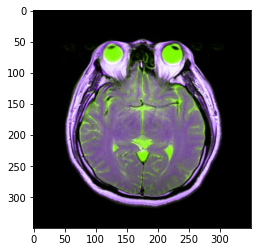

In [28]:
plt.imshow(F1_train[0])
plt.show()

## Data Augmentation

In [29]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import Sequence
class MultipleImageGenerator(Sequence):
  def __init__(self, x1 ,x2 ,x3,x4,x5,x6,x7,x8,x9,x10, y,batch_size):
    self.generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.25],
    horizontal_flip=True,
    vertical_flip=True,
    )
    self.gen_x1 = self.generator.flow(x1, y, batch_size = batch_size, seed=1)
    self.gen_x2 = self.generator.flow(x2, y, batch_size = batch_size, seed=1)
    self.gen_x3 = self.generator.flow(x3, y, batch_size = batch_size, seed=1)
    self.gen_x4 = self.generator.flow(x4, y, batch_size = batch_size, seed=1)
    self.gen_x5 = self.generator.flow(x5, y, batch_size = batch_size, seed=1)
    self.gen_x6 = self.generator.flow(x6, y, batch_size = batch_size, seed=1)
    self.gen_x7 = self.generator.flow(x7, y, batch_size = batch_size, seed=1)
    self.gen_x8 = self.generator.flow(x8, y, batch_size = batch_size, seed=1)
    self.gen_x9 = self.generator.flow(x9, y, batch_size = batch_size, seed=1)
    self.gen_x10 = self.generator.flow(x10, y, batch_size = batch_size, seed=1)
  def __len__(self):
    return self.gen_x1.__len__()
  
  def __getitem__(self,index):
    x1_batch, y_batch = self.gen_x1.__getitem__(index)
    x2_batch, y_batch = self.gen_x2.__getitem__(index)
    x3_batch, y_batch = self.gen_x3.__getitem__(index)
    x4_batch, y_batch = self.gen_x4.__getitem__(index)
    x5_batch, y_batch = self.gen_x5.__getitem__(index)
    x6_batch, y_batch = self.gen_x6.__getitem__(index)
    x7_batch, y_batch = self.gen_x7.__getitem__(index)
    x8_batch, y_batch = self.gen_x8.__getitem__(index)
    x9_batch, y_batch = self.gen_x9.__getitem__(index)
    x10_batch, y_batch = self.gen_x10.__getitem__(index)
    x_batch = np.concatenate((x1_batch, x2_batch, x3_batch,x4_batch,x5_batch,x6_batch,x7_batch,x8_batch,x9_batch,x10_batch),3)
    return x_batch, y_batch

In [30]:
class ValidImageGenerator(Sequence):
  def __init__(self, x1 ,x2 ,x3,x4,x5,x6,x7,x8,x9,x10, y, batch_size):
    self.generator = ImageDataGenerator()
    self.gen_x1 = self.generator.flow(x1, y, batch_size = batch_size, seed=1)
    self.gen_x2 = self.generator.flow(x2, y, batch_size = batch_size, seed=1)
    self.gen_x3 = self.generator.flow(x3, y, batch_size = batch_size, seed=1)
    self.gen_x4 = self.generator.flow(x4, y, batch_size = batch_size, seed=1)
    self.gen_x5 = self.generator.flow(x5, y, batch_size = batch_size, seed=1)
    self.gen_x6 = self.generator.flow(x6, y, batch_size = batch_size, seed=1)
    self.gen_x7 = self.generator.flow(x7, y, batch_size = batch_size, seed=1)
    self.gen_x8 = self.generator.flow(x8, y, batch_size = batch_size, seed=1)
    self.gen_x9 = self.generator.flow(x9, y, batch_size = batch_size, seed=1)
    self.gen_x10 = self.generator.flow(x10, y, batch_size = batch_size, seed=1)
  def __len__(self):
    return self.gen_x1.__len__()
    
  def __getitem__(self, index):
    x1_batch, y_batch = self.gen_x1.__getitem__(index)
    x2_batch, y_batch = self.gen_x2.__getitem__(index)
    x3_batch, y_batch = self.gen_x3.__getitem__(index)
    x4_batch, y_batch = self.gen_x4.__getitem__(index)
    x5_batch, y_batch = self.gen_x5.__getitem__(index)
    x6_batch, y_batch = self.gen_x6.__getitem__(index)
    x7_batch, y_batch = self.gen_x7.__getitem__(index)
    x8_batch, y_batch = self.gen_x8.__getitem__(index)
    x9_batch, y_batch = self.gen_x9.__getitem__(index)
    x10_batch, y_batch = self.gen_x10.__getitem__(index)
    x_batch = np.concatenate((x1_batch, x2_batch, x3_batch,x4_batch,x5_batch,x6_batch,x7_batch,x8_batch,x9_batch,x10_batch),3)
    return x_batch, y_batch


## Build Model :  vertical stack three images

In [31]:
from keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from keras import applications
from keras.layers import Dense,Dropout,Flatten,MaxPool2D,Conv2D,Activation,BatchNormalization,concatenate
from keras import optimizers
from keras.applications.vgg16 import VGG16


In [32]:
from keras.optimizers.optimizer_experimental.optimizer import optimizer_utils
from tensorflow.keras import regularizers

#conv2D block 1
model = Sequential(name = 'Early_Fusion_Model')
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(350,350,30),
              padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D())
#conv2D block 2
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
#conv2D block 3
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
#conv2D block 4
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(Flatten())
#fully_connected layer
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,kernel_regularizer=regularizers.l2(0.01),activation="relu"))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(learning_rate=0.0001) ,metrics=['accuracy'])
model.summary()

Model: "Early_Fusion_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 350, 350, 64)      17344     
                                                                 
 activation (Activation)     (None, 350, 350, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 350, 350, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 350, 350, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 175, 175, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 175, 175, 128)     73856     
                                                

In [33]:
batch_size = 8
steps_per_epochs = 14
height = 350
width = 350
channel = 3
depth =22

In [34]:
from keras.preprocessing import image as image_utils
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.applications import VGG16

In [35]:
#Training & Validation Dataset
train = MultipleImageGenerator(F1_train,F2_train,F3_train,F4_train,F5_train,F6_train,F7_train,F8_train,F9_train,F10_train,y_train,8)
valid = ValidImageGenerator(F1_valid, F2_valid, F3_valid,F4_valid, F5_valid, F6_valid,F7_valid, F8_valid, F9_valid,F10_valid, y_valid,8)

In [36]:
F2_train.shape

(112, 350, 350, 3)

In [37]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


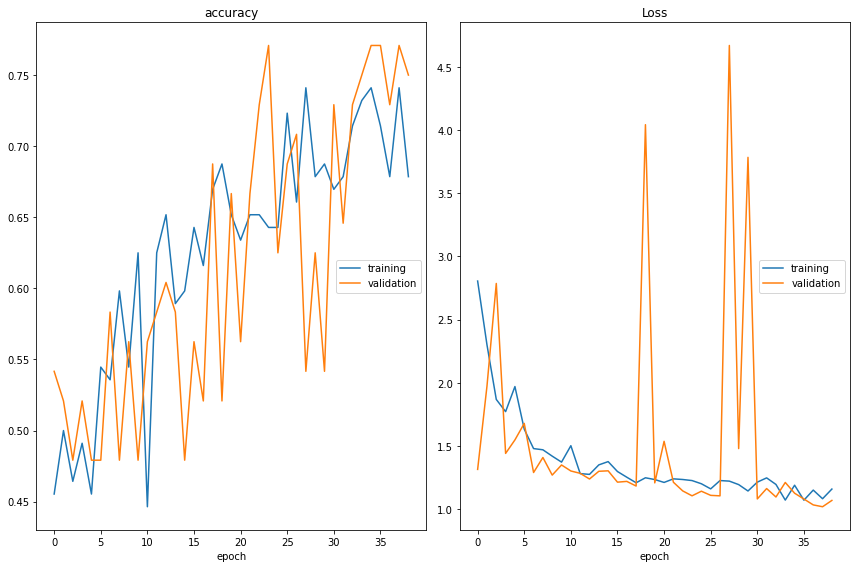

accuracy
	training         	 (min:    0.446, max:    0.741, cur:    0.679)
	validation       	 (min:    0.479, max:    0.771, cur:    0.750)
Loss
	training         	 (min:    1.071, max:    2.805, cur:    1.159)
	validation       	 (min:    1.019, max:    4.670, cur:    1.069)
14/14 [==============================] - 175s 12s/step - loss: 1.1593 - accuracy: 0.6786 - val_loss: 1.0693 - val_accuracy: 0.7500


In [38]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    mode='max',
    patience=15
)
from livelossplot import PlotLossesKeras
plotlosses=PlotLossesKeras()
epochs = 50
model.fit(train,
          epochs = epochs,
          validation_data = valid,
          callbacks = [plotlosses, early_stopping])

In [39]:
X_test = np.array(X_test)
X_test.shape 

(880, 350, 350, 3)

In [40]:
X_test = X_test.reshape((40,22,350,350,3))

In [41]:
X1_test = [] 
X2_test = []
X3_test = []
X4_test = [] 
X5_test = []
X6_test = []
X7_test = [] 
X8_test = []
X9_test = []
X10_test = []
for i in range(len(X_test)):
  for j in range(9,19):
    if(j==9):
      X1_test.append(X_test[i][j])
    if(j==10):
      X2_test.append(X_test[i][j])
    if(j==11):
      X3_test.append(X_test[i][j])
    if(j==12):
      X4_test.append(X_test[i][j])
    if(j==13):
      X5_test.append(X_test[i][j])
    if(j==14):
      X6_test.append(X_test[i][j])
    if(j==15):
      X7_test.append(X_test[i][j])
    if(j==16):
      X8_test.append(X_test[i][j])
    if(j==17):
      X9_test.append(X_test[i][j])
    if(j==18):
      X10_test.append(X_test[i][j])

In [42]:
X1_test = np.array(X1_test)
X2_test = np.array(X2_test)
X3_test = np.array(X3_test)
X4_test = np.array(X4_test)
X5_test = np.array(X5_test)
X6_test = np.array(X6_test)
X7_test = np.array(X7_test)
X8_test = np.array(X8_test)
X9_test = np.array(X9_test)
X10_test = np.array(X10_test)

In [43]:
pred = model.predict(
    np.concatenate([X1_test, X2_test,X3_test,X4_test,X5_test, X6_test,X7_test,X8_test,X9_test, X10_test],3),
    batch_size= 8)

5/5 [==============================] - 17s 3s/step


In [44]:
pred

array([[0.1866633 ],
       [0.26425704],
       [0.99539137],
       [0.9998885 ],
       [0.8894317 ],
       [0.88146675],
       [0.48890382],
       [0.99934304],
       [0.7424284 ],
       [0.12826055],
       [0.23268536],
       [0.26788855],
       [0.18723953],
       [0.22947647],
       [0.13364701],
       [0.41319802],
       [0.18943417],
       [0.7574963 ],
       [0.85264754],
       [0.15384622],
       [0.99253094],
       [0.31850114],
       [0.9999165 ],
       [0.2386879 ],
       [0.5227141 ],
       [0.24914788],
       [0.48156473],
       [0.9992433 ],
       [0.45802888],
       [0.14810042],
       [0.99735856],
       [0.99400026],
       [0.97947705],
       [0.24977534],
       [0.25353363],
       [0.4274276 ],
       [0.932479  ],
       [0.21472415],
       [0.9031578 ],
       [0.49544048]], dtype=float32)

In [45]:
Disease_1 = pred.flatten()

In [46]:
Disease_1 = np.array(Disease_1)

In [47]:
Disease_0 = np.ones(40) - Disease_1

In [48]:
Disease_0

array([8.13336700e-01, 7.35742956e-01, 4.60863113e-03, 1.11520290e-04,
       1.10568285e-01, 1.18533254e-01, 5.11096179e-01, 6.56962395e-04,
       2.57571578e-01, 8.71739447e-01, 7.67314643e-01, 7.32111454e-01,
       8.12760472e-01, 7.70523533e-01, 8.66352990e-01, 5.86801976e-01,
       8.10565829e-01, 2.42503703e-01, 1.47352457e-01, 8.46153781e-01,
       7.46905804e-03, 6.81498855e-01, 8.35061073e-05, 7.61312097e-01,
       4.77285922e-01, 7.50852123e-01, 5.18435270e-01, 7.56680965e-04,
       5.41971117e-01, 8.51899579e-01, 2.64143944e-03, 5.99974394e-03,
       2.05229521e-02, 7.50224665e-01, 7.46466368e-01, 5.72572410e-01,
       6.75209761e-02, 7.85275847e-01, 9.68422294e-02, 5.04559517e-01])

In [49]:
Disease = []
for i in Disease_1:
    if i > 0.5:
        Disease.append(1)
    else:
        Disease.append(0)

In [50]:
Disease = np.array(Disease)

In [51]:
df = pd.DataFrame()
df['Disease_0'] = Disease_0
df['Disease_1'] = Disease_1
df['Disease'] = Disease 

In [52]:
df

,Disease_0,Disease_1,Disease
0,0.813337,0.186663,0
1,0.735743,0.264257,0
2,0.004609,0.995391,1
3,0.000112,0.999888,1
4,0.110568,0.889432,1
5,0.118533,0.881467,1
6,0.511096,0.488904,0
7,0.000657,0.999343,1
8,0.257572,0.742428,1
9,0.871739,0.128261,0


In [54]:
tumor = []
normal = []
df['Ind'] = df.index

In [58]:
for i in range(40):
  if(df['Disease'][i]==0):
    normal.append(df['Ind'][i])
  else:
    tumor.append(df['Ind'][i])

In [59]:
print(normal)

[0, 1, 6, 9, 10, 11, 12, 13, 14, 15, 16, 19, 21, 23, 25, 26, 28, 29, 33, 34, 35, 37, 39]


In [60]:
print(tumor)

[2, 3, 4, 5, 7, 8, 17, 18, 20, 22, 24, 27, 30, 31, 32, 36, 38]
